# PROJET PYBD

[Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

In [108]:
import pandas as pd
import seaborn as sns
import plotly.express as px 

pd.options.plotting.backend = "plotly"

In [126]:
alcohol_consumption = pd.read_csv('data/gho_alcohol_consumer_past_12months.csv')
alcohol_consumption.dropna(how='all', axis=1, inplace=True)
alcohol_consumption = alcohol_consumption.rename(columns = {"SpatialDimValueCode": "Code"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Location": "Country"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Value": "% of alcohol drinkers"})
alcohol_consumption = alcohol_consumption.rename(columns = {"Dim1ValueCode": "Sex"})
alcohol_consumption = alcohol_consumption.rename(columns = {"ParentLocationCode": "Zone"})
pib = pd.read_csv('data/gdp-per-capita-worldbank.csv')
pib = pib.rename(columns = {"GDP per capita, PPP (constant 2017 international $)": "GDP"})
del pib['Entity']
pib = pib.sort_values(by = ['Year'])
pib = pib.drop_duplicates(subset=['Code'], keep='last')

In [127]:
test = pd.merge(alcohol_consumption, pib, on = 'Code')
test

,Zone,Code,Country,Sex,% of alcohol drinkers,Year,GDP
0,WPR,MHL,Marshall Islands,BTSX,.,2019,4029.086329
1,WPR,MHL,Marshall Islands,FMLE,.,2019,4029.086329
2,WPR,MHL,Marshall Islands,MLE,.,2019,4029.086329
3,WPR,PLW,Palau,BTSX,.,2019,17572.622601
4,WPR,PLW,Palau,FMLE,.,2019,17572.622601
...,...,...,...,...,...,...,...
541,EUR,IRL,Ireland,BTSX,81.3,2020,89688.956958
542,EUR,IRL,Ireland,MLE,89.5,2020,89688.956958
543,EUR,LUX,Luxembourg,FMLE,87.7,2020,110261.157353
544,EUR,LUX,Luxembourg,BTSX,91.8,2020,110261.157353


In [133]:
px.scatter(test[test.Sex == 'BTSX'], x='GDP', y= '% of alcohol drinkers',  hover_name="Country")

In [136]:
px.scatter(test[test.Sex == 'BTSX'], x='GDP', y= '% of alcohol drinkers', hover_name="Country", log_x = True)

In [137]:
px.scatter(test[test.Sex == 'BTSX'], x='GDP', y= '% of alcohol drinkers', color = 'Zone', hover_name="Country", log_x = True)

### Heatmap

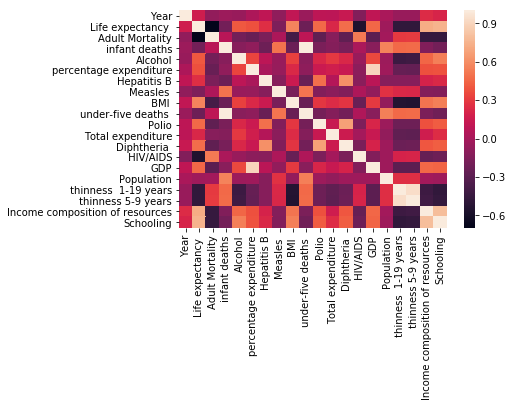

In [18]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)